In [11]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import ticker
base_dir = "/content/drive/MyDrive/NetworkTrafficForecasting2505"

In [13]:
file_name = f"{base_dir}/Data/Abilene-OD_pair.csv"  # the input filename

In [14]:
df = pd.read_csv(file_name)

In [15]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d-%H-%M')  # Parse the time

In [16]:
data_columns = list(df.columns.values)
data_columns.remove('time')
data = df[data_columns].values
df[data_columns] = data

In [17]:
aggregated_time_series = np.sum(data, axis=1)
df_ts = pd.DataFrame()
df_ts['date'] = df['time']
df_ts['data'] = aggregated_time_series / 1000  # Plot in Mbps

In [18]:
# 計算第 1 百分位和第 99 百分位
lower = df_ts['data'].quantile(0.01)
upper = df_ts['data'].quantile(0.99)

# 找出異常值（低於 1% 或高於 99%）
outliers = (df_ts['data'] < lower) | (df_ts['data'] > upper)

# 將異常值設為 NaN
df_ts.loc[outliers, 'data'] = np.nan

# 確保索引是時間類型（插值會用到）
df_ts.index = pd.to_datetime(df_ts.index)

# 插值法補 NaN（依時間的線性插值）
df_ts['data'] = df_ts['data'].interpolate(method='time')

In [20]:
# add a datetimeindex
dates = pd.DatetimeIndex(df_ts['date'])
df_ts = df_ts.set_index(dates).resample('15min').mean()

In [21]:
df_ts = df_ts.drop(["date"], axis=1)

In [22]:
df_ts

,data
date,
2004-03-01 00:00:00,3033.615705
2004-03-01 00:15:00,2998.882135
2004-03-01 00:30:00,3021.990788
2004-03-01 00:45:00,2891.423110
2004-03-01 01:00:00,3052.528161
...,...
2004-09-10 22:45:00,4450.270602
2004-09-10 23:00:00,4271.527369
2004-09-10 23:15:00,4029.186746


<Axes: xlabel='date'>

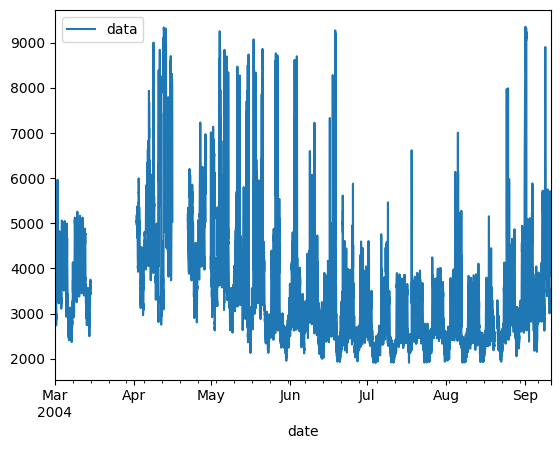

In [23]:
df_ts.plot()

In [24]:
df_ts.to_csv(f"{base_dir}/Processed_Dataset/Abilene_15min.csv")